# **Setting up a Kaufman Network:**
##### I've minimized each section for scrollability; please unhide each header in order to look at and run the code

### Creating the boolean evaluation functions

In [146]:
# Import module random for random assignment and choice
from random import *

# Defining the 16 boolean evaluation functions for the Kaufman network model
def f0(val1,val2):
  return 0

def f1(val1,val2):
  return val1 

def f2(val1,val2):
  return 1-val1 

def f3(val1,val2):
  return val2 

def f4(val1,val2):
  return 1-val2 

def f5(val1,val2):
  if val1+val2 == 0:
    return 0
  else:
    return 1

def f6(val1,val2):
  if val1+val2 == 0:
    return 1
  else:
    return 0

def f7(val1,val2):
  if val1+val2 == 1:
    return 0
  else:
    return 1

def f8(val1,val2):
  if val1+val2 == 1:
    return 1
  else:
    return 0

def f9(val1,val2):
  if val1+val2 == 2:
    return 0
  else:
    return 1

def f10(val1, val2):
  if val1+val2 == 2:
    return 1
  else:
    return 0

def f11(val1, val2):
  if val1>val2:
    return 1
  else: 
    return 0

def f12(val1, val2):
  if val1>val2:
    return 0
  else: 
    return 1

def f13(val1, val2):
  if val2>val1:
    return 1
  else: 
    return 0

def f14(val1, val2):
  if val2>val1:
    return 0
  else: 
    return 1

def f15(val1, val2):
  return 1

### Consolidating the functions into boolEval(type, val1, val2)

In [147]:
# A consolidated evaluation function; type specifies which of the 16 functions 
# to use
def boolEval(type, val1, val2):
  functions = {0: f0,
               1: f1,
               2: f2,
               3: f3,
               4: f4,
               5: f5,
               6: f6,
               7: f7,
               8: f8,
               9: f9,
               10: f10,
               11: f11,
               12: f12,
               13: f13,
               14: f14,
               15: f15
           }
  f = functions[type]
  return f(val1,val2)

### Defining a node in the network

In [148]:
# Defining a node in this network
class node:

  # Default initialization specification
  def __init__(self):

    # Notice the type indicates that the function we use in the beginning is
    # f0(val1,val2)
    self.type = 0 

    # No neighbors at initialization of the node
    self.neigh1 = None
    self.neigh2 = None

    # Random assignment of on/off value for the gene
    self.value = choice([0,1])

    # Storing old value for future reference           
    self.oldvalue = self.value

  # Functions to define neighbors, the values of whom function as inputs for
  # the boolEval function
  def setNeigh1(self,aNeigh):
    self.neigh1 = aNeigh

  def setNeigh2(self, aNeigh):
    self.neigh2 = aNeigh

  # Changing values when the network evolves using boolEval
  def evolveValue(self):
    
    # Notice here that we use the old value of each neighbor to evaluate our
    # evolutions so that we're not using evolved values in order to evolve our
    # node
    self.value = boolEval(self.type,self.neigh1.oldvalue,self.neigh2.oldvalue)

  # Simple function to get the value of our node
  def getValue(self):
    return self.value

### Defining a network

In [149]:
# Finally, we can use our previous definitions to create our network
class net:

  # At initialization we need an input of the size so we know how many nodes
  # are in our network
  def __init__(self, size):

    # Assign and store size value for easy access
    self.size = size

    # Initialize a list of nodes
    self.nodes = []
    for i in range(0,size): self.nodes.append(node())

    # For each node, we initialize the neighbors as random nodes within the
    # network
    for i in range(0,size): 
      self.nodes[i].setNeigh1(self.nodes[randrange(0,size)])
    for i in range(0,size): 
      self.nodes[i].setNeigh2(self.nodes[randrange(0,size)])

    # We also randomly initialize the type from [0,15] in reference to which
    # boolEval function should be used
    for i in range(0,size):
      self.nodes[i].type = randrange(0,16)

  # We want some consolidated function to evolve every node in the network
  def evolveNet(self):

    # We loop through each node and evolve it
    for i in range(0,self.size):  
      self.nodes[i].evolveValue()

    # We update the oldvalue accordingly
    for i in range(0,self.size):
      self.nodes[i].oldvalue = self.nodes[i].value     

  # Printing the type of each node in order of list index
  def printTypes(self):
    for i in range(0,self.size): print(self.nodes[i].type,)
    print()

  # To print our network, we print the on/off values in order of list index
  def printNet(self):
    for i in range(0,self.size): print(self.nodes[i].value,)
    print()

  # Creating a list of the values within our network for easy access
  def listvalues(self):
    l = []
    for i in range(0,self.size): l += [self.nodes[i].value]
    return l

  # I am going to add a better print statement
  def printNetTable(self):
    print("Node ID\t\tValue\t\tNeighbor 1\t\tNeighbor 2")
    for i in range(0,self.size):
      out = ""
      out += str(i) + "\t\t"
      node = self.nodes[i]
      out += str(node.value) + "\t\t"
      nbr1 = node.neigh1
      nbr1id = self.nodes.index(nbr1)
      out += str(nbr1id) + "\t\t\t"
      nbr2 = node.neigh2
      nbr2id = self.nodes.index(nbr2)
      out += str(nbr2id)
      print(out)

#**Question: What happens if two well-connected subnetworks have limited connections between each other?**

### Creating a network called testnet in order to test it and answer the above question

##### Take note of the major changes in initialization

In [150]:
# Let's create a network of the above specifications
class testnet:

  # Initialize a network of a specified size
  def __init__(self, size, overlap):

    # Add the number of nodes accordingly
    self.size = size
    self.nodes = []
    for i in range(0,size): self.nodes.append(node())
    
    # Now, let's split the network into its halves, such that the first half
    # is well connected and the second half is well connected, but they aren't
    # yet connected to each other
    half_point = int(size/2)

    # In order to ensure that the subnetworks are well-connected, let's make
    # sure for each node that their assigned neighbors 1 and 2 are different
    # nodes
    # We'll also initialize their types in this loop while we're at it

    # First half
    for i in range(0, half_point):
      self.nodes[i].type = randrange(0,16)
      nbr1 = randrange(0,half_point)
      nbr2 = randrange(0,half_point)
      while nbr1 == nbr2:
        nbr1 = randrange(0,half_point)
        nbr2 = randrange(0,half_point)
      self.nodes[i].setNeigh1(self.nodes[nbr1])
      self.nodes[i].setNeigh2(self.nodes[nbr2])

    # Second half
    for i in range(half_point, size):
      self.nodes[i].type = randrange(0,16)
      nbr1 = randrange(half_point,size)
      nbr2 = randrange(half_point,size)
      while nbr1 == nbr2:
        nbr1 = randrange(half_point,size)
        nbr2 = randrange(half_point,size)
      self.nodes[i].setNeigh1(self.nodes[nbr1])
      self.nodes[i].setNeigh2(self.nodes[nbr2])

    # Let's manually assign overlap

    # First half
    visiting = []
    for i in range(1,overlap):
      nodeid = randrange(0,half_point)
      while nodeid in visiting:
        nodeid = randrange(0,half_point)
      visiting.append(nodeid)
      nbrid = randrange(half_point,size)
      while nbrid in visiting:
        nbrid = randrange(half_point,size)
      visiting.append(nbrid)
      self.nodes[nodeid].setNeigh1(self.nodes[nbrid])

    # Second half
    visiting = []
    for i in range(1,overlap):
      nodeid = randrange(half_point,size)
      while nodeid in visiting:
        nodeid = randrange(half_point,size)
      visiting.append(nodeid)
      nbrid = randrange(0,half_point)
      while nbrid in visiting:
        nbrid = randrange(0,half_point)
      visiting.append(nbrid)
      self.nodes[nodeid].setNeigh1(self.nodes[nbrid])
      
  # Here we can use our usually specified functions from before
  
  # Note that I'm going to use the same evolveNet in order to see how the
  # network evolves over time
  def evolveNet(self):
    for i in range(0,self.size):  
      self.nodes[i].evolveValue()
    for i in range(0,self.size):
      self.nodes[i].oldvalue = self.nodes[i].value     

  def printTypes(self):
    for i in range(0,self.size): print(self.nodes[i].type,)
    print()

  def printNet(self):
    for i in range(0,self.size): print(self.nodes[i].value,)
    print()

  def printNetTable(self):
    print("Node ID\t\tValue\t\tNeighbor 1\t\tNeighbor 2")
    for i in range(0,self.size):
      out = ""
      out += str(i) + "\t\t"
      node = self.nodes[i]
      out += str(node.value) + "\t\t"
      nbr1 = node.neigh1
      nbr1id = self.nodes.index(nbr1)
      out += str(nbr1id) + "\t\t\t"
      nbr2 = node.neigh2
      nbr2id = self.nodes.index(nbr2)
      out += str(nbr2id)
      print(out)

  def listvalues(self):
    l = []
    for i in range(0,self.size): l += [self.nodes[i].value]
    return l

### Setting the stage to run a simulation of the networks

In [154]:
# Function to track the length of a cycle between past and new states
def cycle(curr, past):

    # Past tracks past states, curr tracking the current one
    for i in range(len(past)):

        # If they match then we've found a cycle
        if past[i] == curr:

            # Return length of cycle as well as path to cycle
            return len(past) - i, i

# geneRunControl runs a simulation of our default Kaufman network
def geneRunControl(size):

    # Getting relevant info and variables
    genenet = net(size)
    curr = genenet.listvalues()
    past = []

    # We define net size and cycle through current and past states
    while cycle(curr, past) == None:
        genenet.evolveNet()
        past += [curr]
        curr = genenet.listvalues()

    # Return
    return cycle(curr,past)

# geneRunControl runs a simulation of our default Kaufman network
def geneRunTest(size,overlap):

    # Getting relevant info and variables
    genenet = testnet(size,overlap)
    curr = genenet.listvalues()
    past = []

    # We define net size and cycle through current and past states
    while cycle(curr, past) == None:
        genenet.evolveNet()
        past += [curr]
        curr = genenet.listvalues()

    # Return
    return cycle(curr,past)

### Writing code that will run multiple trials on each type of network

In [158]:
# This is mostly taken from the homework, simply with specifications on
# whether to run the control net or test net

# Just gonna import a module rather than making my own median function
from statistics import median

# Print cycle length and path length of the cycle
# Also print mean and median cycle length
def controlnet_trials(ntrials, netsize, printsummary = True, \
                      printresults = True):

    # Tracking trials and filling out based on intended ntrials
    trials = []
    for i in range(ntrials):
        trial = geneRunControl(netsize)
        trials += [trial]

    # Preparing to print cycle length
    totcycles = 0
    totplength = 0
    if printresults:
      print('Trial:\t\tCycle length:\t\tPath length:')
    cyclelist = []
    plengthlist = []
    for t in trials:
        if printresults:
          print(str(trials.index(t)) + "\t\t" + str(t[0]) + '\t\t\t' + \
                str(t[1]))
        cyclelist += [t[0]]
        plengthlist += [t[1]]
        totcycles += t[0]
        totplength += t[1]
    if printsummary:
      print('The mean cycle length was ' + str(float(totcycles/ntrials)))
      print('The median cycle length was ' + str(median(cyclelist)))

    # Returning a list of the cycle lengths per trial
    return (float(totcycles/ntrials),median(cyclelist),cyclelist,float(totplength/ntrials),plengthlist) 

# Print cycle length and path length of the cycle
# Also print mean and median cycle length
def testnet_trials(ntrials, netsize, overlap, printsummary = True, \
                   printresults = True):

    # Tracking trials and filling out based on intended ntrials
    trials = []
    for i in range(ntrials):
        trial = geneRunTest(netsize,overlap)
        trials += [trial]

    # Preparing to print cycle length
    totcycles = 0
    totplength = 0
    if printresults:
      print('Trial:\t\tCycle length:\t\tPath length:')
    cyclelist = []
    plengthlist = []
    for t in trials:
        if printresults:
          print(str(trials.index(t)) + "\t\t" + str(t[0]) + '\t\t\t' + str(t[1]))
        cyclelist += [t[0]]
        plengthlist += [t[1]]
        totcycles += t[0]
        totplength += t[1]
    
    if printsummary:
      print('The mean cycle length was ' + str(float(totcycles/ntrials)))
      print('The median cycle length was ' + str(median(cyclelist)))

    # Returning a list of the cycle lengths per trial
    return (float(totcycles/ntrials),median(cyclelist),cyclelist,float(totplength/ntrials),plengthlist) 

### Simulating the control net and test net in order to see the distinctions

In [273]:
# Testing the behavior of the network with completely random overlap
def control_analysis():
  results = controlnet_trials(100,64,printsummary=False,printresults=False)
  control = {}
  control['Mean Cycles'] = results[0]
  control['Median Cycles'] = results[1]
  control['Cycle Lengths'] = results[2]
  control['Mean Path Length'] = results[3]
  control['Path Lengths'] = results[4]
  return control

# Testing the behavior of the network with overlap from [0,16], in which case
# every node has one connection to the other subnetwork
def test_analysis():
  
  data = {}
  for overlap in range(0,33):
    results = testnet_trials(100,64,overlap,printsummary=False,\
                                   printresults=False)
    temp = {}
    temp['Mean Cycles'] = results[0]
    temp['Median Cycles'] = results[1]
    temp['Cycle Lengths'] = results[2]
    temp['Mean Path Length'] = results[3]
    temp['Path Lengths'] = results[4]

    data[overlap] = temp
    
  return data

### Results and Analysis

##### To summarize, I initialized 1 control Kaufman net and 33 test networks, each corresponding to a level of overlapping nodes spanning 0 to 32, inclusive. I performed 200 trials of evolution on each and tracked mean cycle length, median cycle length, and mean path length.

In [274]:
# Running the tests previously outlines
controldata = control_analysis()
data = test_analysis()

# Combining into one dictionary
data['Control'] = controldata

In [265]:
# Importing necessary modules
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [266]:
# Creating a pandas dataframe for easy plotting
overlap = list(data.keys())
meanclen = []
medclen = []
meanplen = []
for key in overlap:
  meanclen.append(data[key]['Mean Cycles'])
  medclen.append(data[key]['Median Cycles'])
  meanplen.append(data[key]['Mean Path Length'])
df = pd.DataFrame({'Overlapping Nodes':overlap,'Mean Cycles':meanclen,\
                   'Median Cycles':medclen,'Mean Path Length':meanplen})

In [267]:
df

,Overlapping Nodes,Mean Cycles,Median Cycles,Mean Path Length
0,0,17.05,6.0,12.61
1,1,21.48,8.0,12.14
2,2,17.17,5.5,11.70
3,3,10.32,6.0,10.83
4,4,15.44,4.0,12.29
5,5,18.10,6.0,15.65
6,6,17.23,6.0,15.24
7,7,14.77,5.5,13.14
8,8,14.18,4.0,19.31
9,9,18.99,4.0,14.43


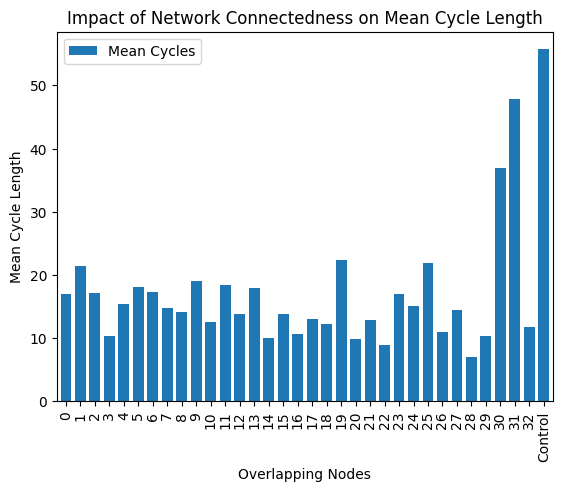

In [275]:
meancplot = df.plot(x='Overlapping Nodes',y='Mean Cycles', kind='bar',title = \
                    "Impact of Network Connectedness on Mean Cycle Length",\
                    width = 0.75)
ignore = meancplot.set_ylabel("Mean Cycle Length")

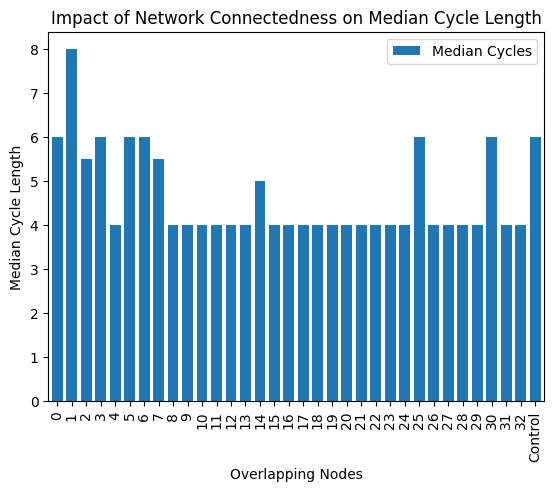

In [277]:
medcplot = df.plot(x='Overlapping Nodes',y='Median Cycles', kind='bar',title = 
                   "Impact of Network Connectedness on Median Cycle Length",\
                   width = 0.75)
ignore = medcplot.set_ylabel("Median Cycle Length")

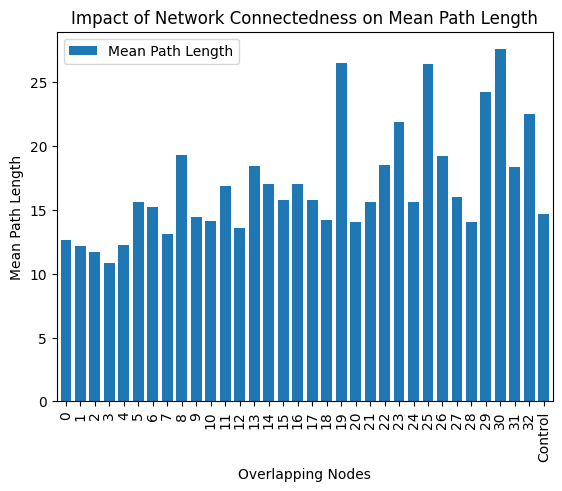

In [278]:
meanpplot = df.plot(x='Overlapping Nodes',y='Mean Path Length', kind='bar',\
                    title = \
                    "Impact of Network Connectedness on Mean Path Length",\
                    width = 0.75)
ignore = meanpplot.set_ylabel("Mean Path Length")

In this script, we initialized the control as a default Kaufman network of size 32 and a series of modified test networks of size 32. The modified network has 2 subnetworks, each of which are half of the overall network. The series of test networks are such that they have increasing levels of connectedness. They span from 0 to 16 overlapping nodes, with 0 being 0 nodes in each subnetwork that is connected to the other subnetwork, and 16 indicating that every node in each subnetwork has one connection to a node in the other subnetwork. I limited the maximum connectedness to one connection to the other subnetwork as opposed to two, as I figure this breaks the scope of the connection, which stipulates subnetworks of limited connection. We can see that there is a vague decrease in mean cycle length, somewhat of a decrease in median cycle length, and a vague increase in mean path length. For further scientific discussion, please see accompanying writeup.